In [1]:
# 1.3 Robbing Banks Reloaded
# Solution to Q Learning and Sarsa

'''
Given Information:

Robber enters the town at position A(0,0), Police start at (3,3), Bank is at (1,1)

Rewards
-------

If an action leads to Bank 
R(s,a) = 1

If caught by police R(s,a) = -10

Assume :
Normal Reward = -1



Objective
---------

Develop an algorithm learning the policy to maximize total discounted reward

Discount factor (lambda)  = 0.8


'''
import matplotlib.pyplot as plt
import numpy as np
import maze as mz 
from random import randint


STAY = 0
LEFT = 1
RIGHT = 2
UP = 3
DOWN = 4

movement = [[0,0],[-1,0],[1,0],[0,-1],[0,1]]

bank =[1,1];

states = dict();
map_id = dict();
s=0
for i in range(4): # X?
            for j in range(4): # Y?
                for k in range(4):
                    for l in range(4):
                        if True:
                            states[s] = (i,j,k,l); # make the state as a quadraple
                            map_id[(i,j,k,l)] = s;
                            s += 1;

def limit_coordinates(c):  # Limit the movement inside 4 by 4
    c[0] = min(c[0], 3)
    c[0] = max(c[0], 0)
    c[1] = min(c[1], 3)
    c[1] = max(c[1], 0)
    return c

def move(state,action):
    
    robber_position = state[0:2]
    police_position = state[2:4]
    
    # Adds the Robber's action
    robber_position = np.add(np.array(robber_position), np.array(movement[action]));
    robber_position = limit_coordinates(robber_position)
    
    # Police's random walk
    while True:
        police_action = randint(1,4);
        police_position_new = np.add(np.array(police_position),np.array(movement[police_action]));
        c = limit_coordinates(police_position_new)
        if(c[0] == police_position[0]  and c[1] == police_position[1]):
            continue;
        else :
            police_position = c;
            break;
    
    
    next_state = (robber_position[0],robber_position[1],police_position[0],police_position[1]);
    next_state_id = map_id[next_state]
    
    #Handling rewards
    
    if(robber_position[0]==police_position[0]) and (robber_position[1]==police_position[1]):
        reward = -10; # Caught
    elif(robber_position[0] == bank[0] and robber_position[1]==bank[1]):
        reward = 1; # Visit Bank
    else:
        reward = -1; # Normal Move
        
    return next_state_id,reward

# Q learning is all about exploitation and less about exploration ( SARSA Does Exploration)
#(0,0,0,0)
# Regarding the states:
# A state can be represented as S = ((x_r,y_r,x_p,y_p))
number_of_states = 4*4*4*4;

number_of_action = 5; # Robber can move Stay, Left , Right , Up , Down



A ={} # This contains the next state and associated rewards
# we build a reward matrix and 

for s in range(number_of_states): 
    A[s] = {a: [] for a in range(number_of_action)}  # Robber
    for a in range(number_of_action):
        A[s][a] = move(states[s],a);
        


        






IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Text(0.5, 0, 'Iteration')

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

/Users/sabarishsridhar/Anaconda3/anaconda3/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/Users/sabarishsridhar/Anaconda3/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


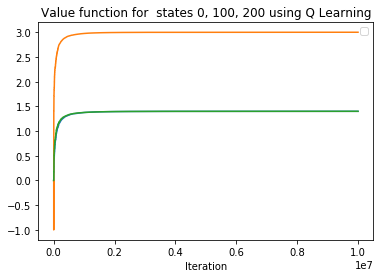

In [2]:
# Q Learning


'''
Q(st, at) +=α*(rt + γ*maxa Q(st+1, a) - Q(st, at))
'''

Q = np.zeros((number_of_states,number_of_action))
V = np.zeros(number_of_states)
n = np.zeros((number_of_states,number_of_action))
start = (0,0,3,3)
state = map_id[start];
l = 0.8 # Discount Factor
no_of_games = 10000000;
# step size is 1/n(s,a)^(2/3) where n(s,a) is the no of updates of Q(s,a)

v_arr= [];
v_arr2=[];
v_arr3=[];
for i in range(no_of_games):
    action = randint(0,4);
    dr = 1/(n[state,action]+1);
    alpha = np.power(dr,2/3);
    new_state, reward = A[state][action]
    #print(new_state,reward)
    #Q[map_id[state]][action] += 
    #print(alpha*(reward+l*max(Q[map_id[new_state]])-Q[map_id[state]][action]))
    Q[state, action] += alpha*(reward+l*max(Q[new_state])-Q[state, action])
    n[state, action] += 1
    
    V[0] = max(Q[0]);
    V[100] = max(Q[100]);
    V[200] = max(Q[200]);
    v_arr.append(V[0]);
    v_arr2.append(V[100]);
    v_arr3.append(V[200]);
    state = new_state
    #print(Q);
#     if(i%100000):
#         print(V[0]);
    
#     if(alpha < 0.01):
#         break;
plt.plot(v_arr,markerfacecolor='green')
plt.title('Value function for  states 0, 100, 200 using Q Learning')
plt.plot(v_arr2,markerfacecolor='blue')
plt.plot(v_arr3,markerfacecolor='white')
plt.legend([v_arr,v_arr2,v_arr3],['State 0','State 100','State 200'])
plt.xlabel('Iteration')



In [17]:



def ep_greedy(state):
    epsilon = 0.5
    # The Goal is to Design a method such that the best action is returned 1-episilon times and a random action is taken epsilon times
    
    o =[0,1,2,3,4];
    best_action = np.argmax(Q[state]);    
    return np.random.choice([best_action,o[0],o[1],o[2],o[3],o[4]],1,p=[1-epsilon,epsilon/5,epsilon/5,epsilon/5,epsilon/5,epsilon/5])


# Q Learning with Epsilon Greedy a.k.a SARSA


''' 
Formula to look out for

Q(t+1)(s, a) = Q(t)(s, a)
+ 1(st,at)=(s,a)αn(t)(st,at) rt + λQ (st+1, at+1) − Q (st, at)
􏰇 (t) 


'''
Q = np.zeros((number_of_states,number_of_action))
V = np.zeros(number_of_states)
n = np.zeros((number_of_states,number_of_action))
start = (0,0,3,3)
state = map_id[start];
l = 0.8 # Discount Factor
no_of_games = 10000000;
# step size is 1/n(s,a)^(2/3) where n(s,a) is the no of updates of Q(s,a)

v_arr= [];
v_arr2=[];
v_arr3=[];
for i in range(no_of_games):
    action = randint(0,4);
    dr = 1/(n[state,action]+1);
    alpha = np.power(dr,2/3);
    new_state, reward = A[state][action]
    #print(new_state,reward)
    #Q[map_id[state]][action] += 
    #print(alpha*(reward+l*max(Q[map_id[new_state]])-Q[map_id[state]][action]))
    
    ## Find the next action using epsilon Greedy method.
    next_action = ep_greedy(new_state);
    
    Q[state, action] += alpha*(reward+l*(Q[new_state][next_action])-Q[state, action])
    n[state, action] += 1
    
    V[0] = max(Q[0]);
    V[100] = max(Q[100]);
    V[200] = max(Q[200]);
    v_arr.append(V[0]);
    v_arr2.append(V[100]);
    v_arr3.append(V[200]);
    state = new_state
    #print(Q);
#     if(i%100000):
#         print(V[0]);
    
#     if(alpha < 0.01):
#         break;
# print(Q);
# print(max(Q[state]))
# plt.plot(v_arr)

# plt.figure();
# plt.plot(v_arr2)

# plt.figure();
# plt.plot(v_arr3)



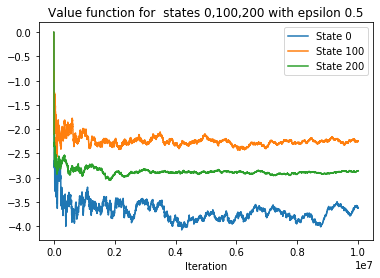

In [18]:
plt.plot(v_arr,markerfacecolor='green',label='State 0')
plt.title('Value function for  states 0,100,200 with epsilon 0.5')
plt.plot(v_arr2,markerfacecolor='blue',label='State 100')
plt.plot(v_arr3,markerfacecolor='red',label='State 200')
plt.xlabel('Iteration')
plt.legend()
plt.show()





In [ ]:
print(Q);

Text(0.5, 0, 'Iteration')

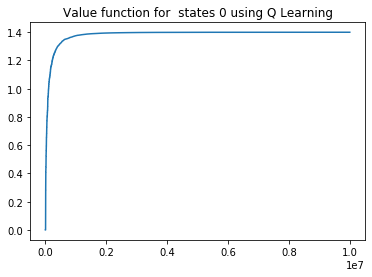

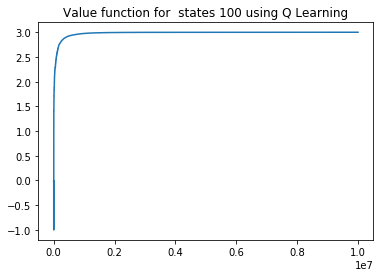

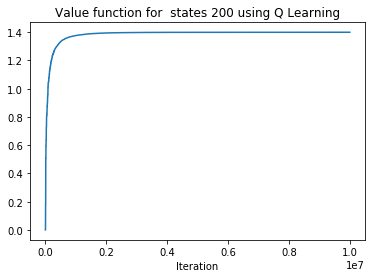

In [6]:
plt.plot(v_arr,markerfacecolor='green')
plt.title('Value function for  states 0 using Q Learning')
plt.figure();
plt.plot(v_arr2,markerfacecolor='blue')
plt.title('Value function for  states 100 using Q Learning')
plt.figure();
plt.plot(v_arr3,markerfacecolor='yellow')
plt.title('Value function for  states 200 using Q Learning')




plt.xlabel('Iteration')

In [26]:
states[200]

(3, 0, 2, 0)